### Section 1

In [37]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [38]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [39]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [40]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
print(df2)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
18    ES_03_0001  41.957268  -2.926857     Spain          Douro       0   
19    ES_03_0002  41.850818  -2.591150     Spain          Douro       0   
28    ES_03_0012  41.498026  -5.528753     Spain          Douro       0   
32    ES_03_0016  41.586853  -3.072064     Spain          Douro       0   
43    ES_03_0029  41.830177  -3.782420     Spain          Douro       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
18            1              

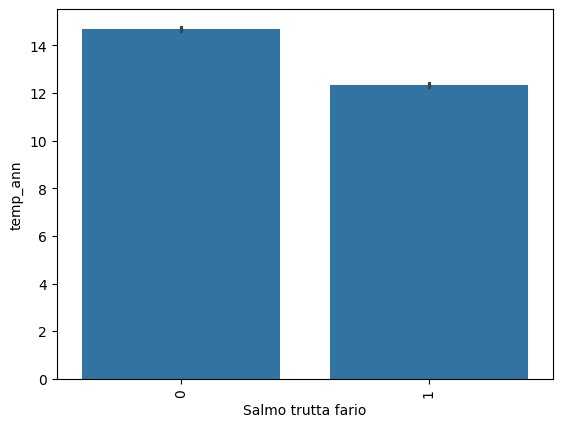

In [42]:
sns.barplot(data=df, x="Salmo trutta fario", y="temp_ann", estimator="mean")
plt.xticks(rotation=90)
plt.show()

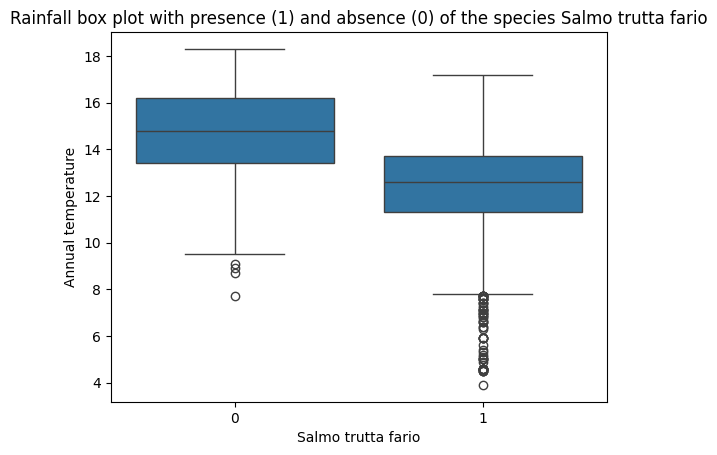

In [43]:
sns.boxplot(x="Salmo trutta fario", y="temp_ann", data=df)
plt.ylabel('Annual temperature')
plt.title("Rainfall box plot with presence (1) and absence (0) of the species Salmo trutta fario")
plt.show()

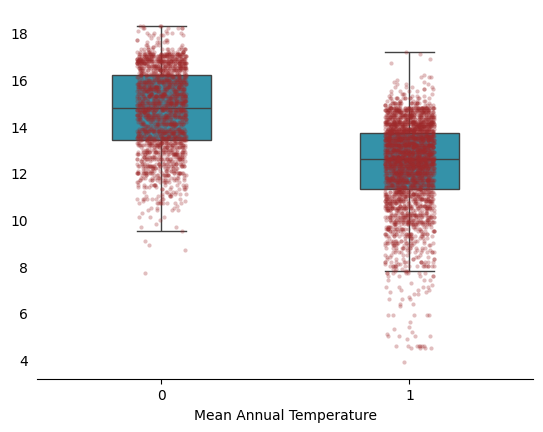

In [44]:
dfsub = df[(df['Salmo trutta fario']==0) | 
    (df['Salmo trutta fario']==1)
    ]
sns.boxplot(
    data= dfsub,
    x='Salmo trutta fario',
    y='temp_ann',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= dfsub,
    x='Salmo trutta fario',
    y='temp_ann',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

### Section 2

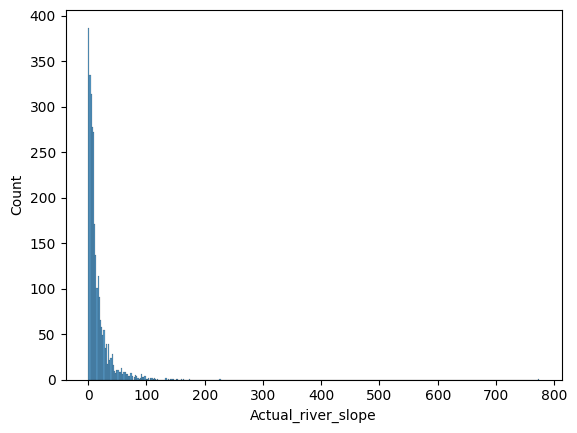

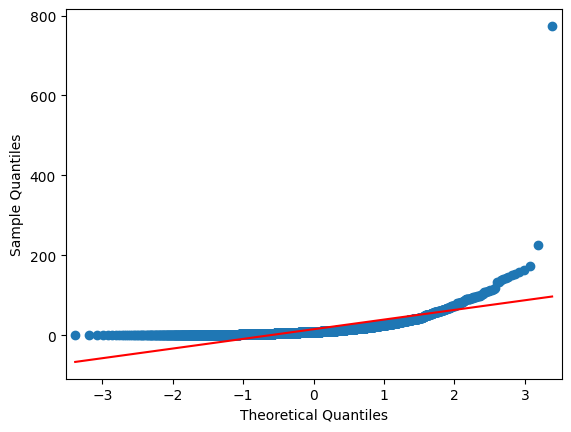

In [45]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns # For plotting

# generate univariate observations
data = df2['Actual_river_slope']

# Histogram
sns.histplot(data)
plt.show()

# q-q plot
qqplot(data, line='s')
plt.show()

In [46]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.480, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


In [47]:
from scipy.stats import anderson

# normality test
result = anderson(data)

print('Statistic: %.3f' % result.statistic)
print('critical values:', result.critical_values)
print('significance level (%):', result.significance_level)
print('Fit results:', result.fit_result)

p = 0
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: 305.868
critical values: [0.575 0.655 0.786 0.917 1.09 ]
significance level (%): [15.  10.   5.   2.5  1. ]
Fit results:   params: FitParams(loc=15.359900779588944, scale=24.16080772696185)
 success: True
 message: '`anderson` successfully fit the distribution to the data.'
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


### Section 3

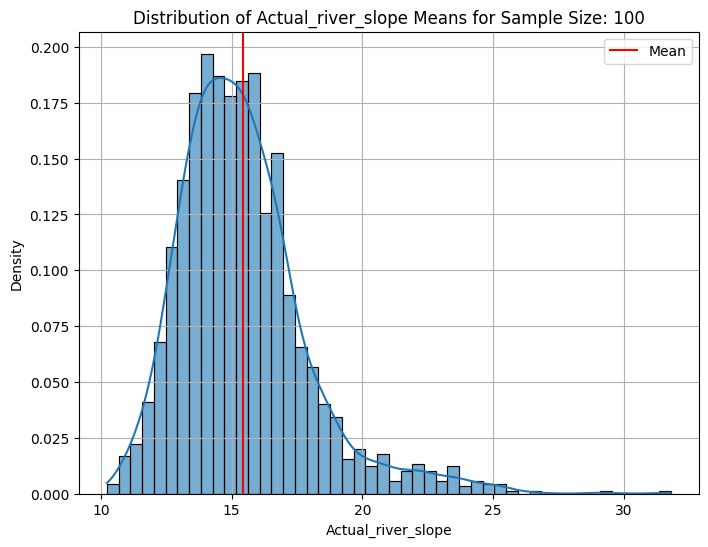

In [72]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista para almacenar las medias de las muestras
sample_means = []

# Lista de tamaños de muestra
sample_size = 100

# Número de iteraciones (muestreos aleatorios)
num_iterations = 2000

for _ in range(num_iterations):
    # Tomar una muestra aleatoria del DataFrame
    df_random = df2[['Actual_river_slope']].sample(sample_size, replace=True)
    
    # Calcular la media de Actual_river_slope para la muestra actual
    sample_mean = df_random['Actual_river_slope'].mean()
    
    # Agregar la media de la muestra actual a la lista de medias de muestra
    sample_means.append(sample_mean)
    
    
sampledf = pd.DataFrame(df_random)

# Calcular la media de las medias de muestra
mean_temp = np.mean(sample_means)

# Crear una nueva figura y ejes para el histograma
plt.figure(figsize=(8, 6))

# Trazar el histograma de las medias de Actual_river_slope para el tamaño de muestra actual
sns.histplot(sample_means, kde=True, stat="density", alpha=0.6)
plt.title(f'Distribution of Actual_river_slope Means for Sample Size: {sample_size}')
plt.xlabel('Actual_river_slope')
plt.ylabel('Density')

# Añadir una línea vertical para la media de las medias de temperatura
plt.axvline(x=mean_temp, color='r', linestyle='-', label='Mean')

plt.legend()
plt.grid(True)
plt.show()


In [69]:
print(sampledf)

      Actual_river_slope
1619               7.480
1902              11.830
4775               3.400
4033              14.504
2226              12.130
...                  ...
4619               9.000
4194               1.600
1674               0.970
2803               0.564
1574               8.980

[100 rows x 1 columns]


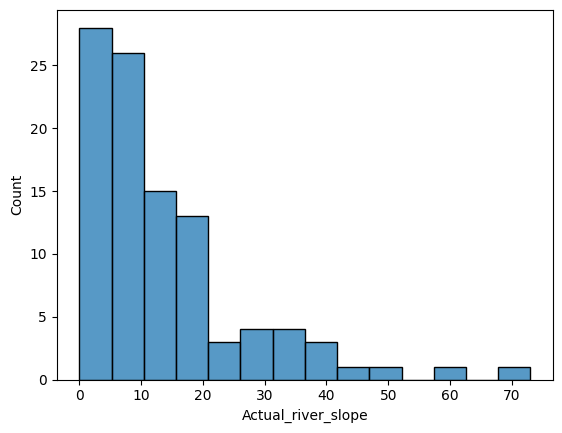

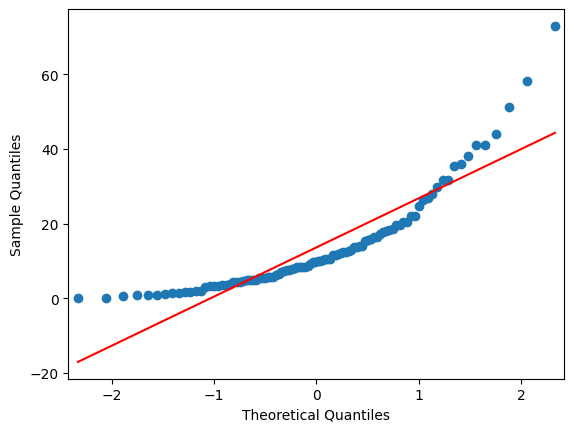

In [73]:
# generate univariate observations
data = sampledf['Actual_river_slope']

# Histogram
sns.histplot(data)
plt.show()

# q-q plot
qqplot(data, line='s')
plt.show()

In [74]:
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.810, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)
